<center>

# Python for Quantum Mechanics: 
# 3D Plots and Animations

</center>

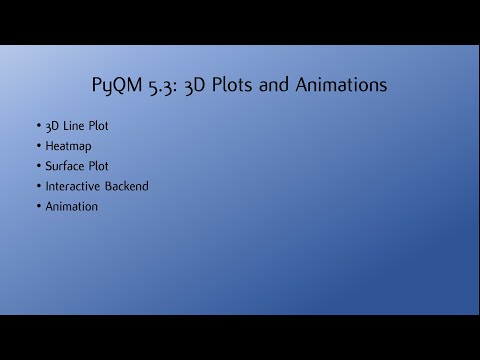

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('2GGQqxRI3fs',width=700, height=400)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Line Plot

To make a 3D plot you must first create a set of axes with the keyword `projection` set to `'3d'`. Then we can populate it with a line using the `.plot3D()` attribute function of the axes object. This is similar to `plt.plot()`, only now it will have three instead of two array argumanets.

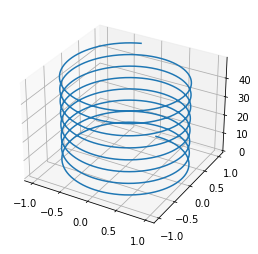

In [3]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,.8,.8], projection='3d')

z = np.arange(0, 50, .01)
x_spiral, y_spiral = np.sin(z), np.cos(z)

ax.plot3D(x_spiral, y_spiral, z)
#ax.view_init(60, 35)

plt.show()

## Heat Map

For plotting a surface it is best to create a 2D mesh grid of points using `np.meshgrid()`; this takes in two numpy arrays that can be thought of as $x$ and $y$ axes to this grid. Lets say the arrays are of lengths $m$ and $n$. The function creates two $n \times m$ matrices; one with rows eqaul to the $x$-array and one with the columns equal to $y$-array.

In [4]:
xs = np.linspace(0, 10, 5)
ys = np.linspace(-5, 5, 11)

Xmesh,Ymesh = np.meshgrid(xs, ys)
print('xs =', xs, '\n')
print('Xmesh =', Xmesh, '\n')
print('ys =', ys, '\n')
print('Ymesh =', Ymesh)

xs = [ 0.   2.5  5.   7.5 10. ] 

Xmesh = [[ 0.   2.5  5.   7.5 10. ]
 [ 0.   2.5  5.   7.5 10. ]
 [ 0.   2.5  5.   7.5 10. ]
 [ 0.   2.5  5.   7.5 10. ]
 [ 0.   2.5  5.   7.5 10. ]
 [ 0.   2.5  5.   7.5 10. ]
 [ 0.   2.5  5.   7.5 10. ]
 [ 0.   2.5  5.   7.5 10. ]
 [ 0.   2.5  5.   7.5 10. ]
 [ 0.   2.5  5.   7.5 10. ]
 [ 0.   2.5  5.   7.5 10. ]] 

ys = [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.] 

Ymesh = [[-5. -5. -5. -5. -5.]
 [-4. -4. -4. -4. -4.]
 [-3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]]


This can can then be used to sample a a grid of $x$- and $y$-axes. We can use these to give each of the grid points a value and plot this. The `plt.pcolormesh()` can be easily used to create a colour projection of a 3d plot. A colour map (`cmap` keyword) is used to specify what colours are mapped to by each value.

In [5]:
def f(x, y):
    return np.cos(np.sqrt(x**2 +y**2))

def g(x, y):
    return np.cos(x) * np.sin(y)

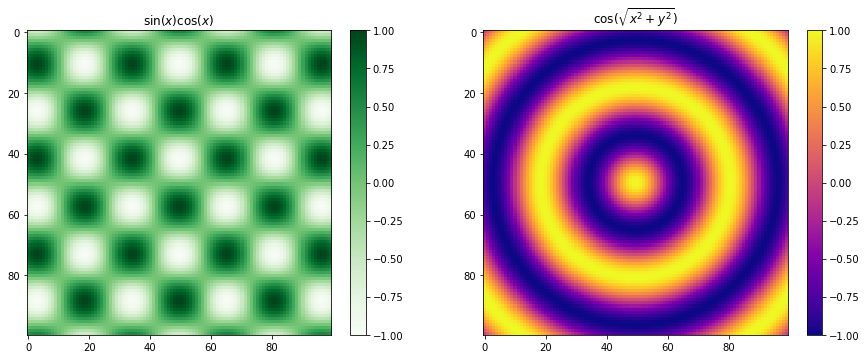

In [6]:
xs = np.linspace(-10, 10, 100)
ys = np.linspace(-10, 10, 100)

Xmesh,Ymesh = np.meshgrid(xs, ys)
Zmesh0 = g(Xmesh,Ymesh)
Zmesh1 = f(Xmesh,Ymesh)

fig, ax = plt.subplots(1,2, figsize=(15,10))

im0 = ax[0].imshow(Zmesh0, cmap = 'Greens')
im1 = ax[1].imshow(Zmesh1, cmap = 'plasma')
fig.colorbar(im0, ax=ax[0], shrink = .56)
fig.colorbar(im1, ax=ax[1], shrink = .56)

ax[0].set_title('$\sin (x) \cos (x)$')
ax[1].set_title('$\cos ( \sqrt{x^2 +y^2} )$')

im0.set_clim([-1,1])
im1.set_clim([-1,1])

plt.show()

## Plotting a Surface

A surface can be plotted in different ways using `.plot_surface()`, `.plot_wireframe()`, or `.contour3D()` attribute function. We can change the view angle on the plot using `.view_init()` by specifying the azimuthal angle `azim` and the angle of elevation `elev` in degrees.

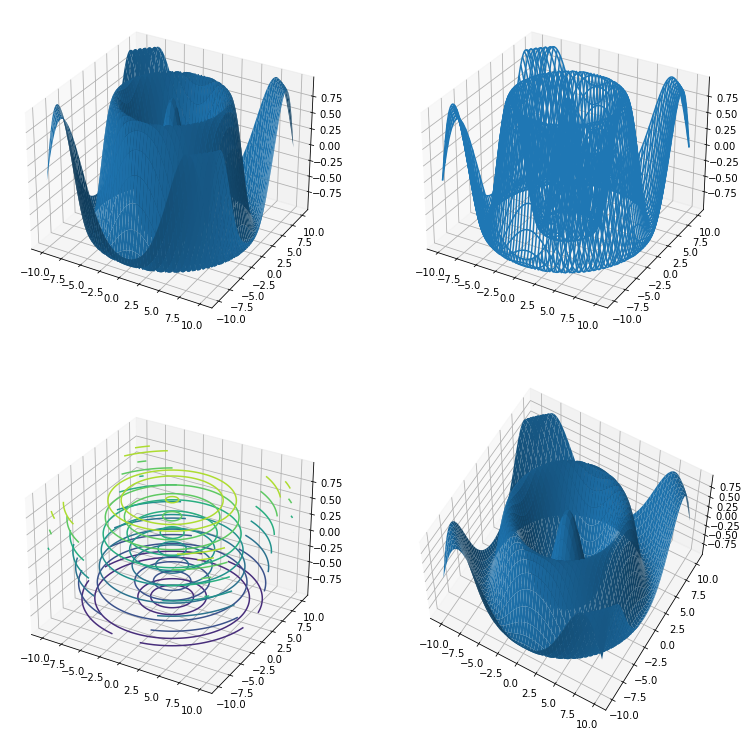

In [7]:
xs = np.linspace(-10, 10, 100)
ys = np.linspace(-10, 10, 100)

Xmesh,Ymesh = np.meshgrid(xs, ys)
Zmesh = f(Xmesh,Ymesh)

fig = plt.figure(figsize=(13,13))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax4 = fig.add_subplot(2, 2, 4, projection='3d')


ax1.plot_surface(Xmesh,Ymesh,Zmesh)
ax2.plot_wireframe(Xmesh,Ymesh,Zmesh)
ax3.contour3D(Xmesh,Ymesh,Zmesh)
ax4.plot_surface(Xmesh,Ymesh,Zmesh)
ax4.view_init(azim=-60, elev=60)

plt.show()

## Interactive Backend

In IPython there exists a magic function, `%matplotlib`, that allows the us to specify the backend for matplotlib. So far we have only been using the default `%matplotlib inline`. For some applictaions it can be useful to use `%matplotlib notebook` which allows interactivity and evolution in time. You always need to be mindful to 'turn off' the image when you are done interacting with it.

In [8]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

We can mess around the the below image.

<IPython.core.display.Javascript object>


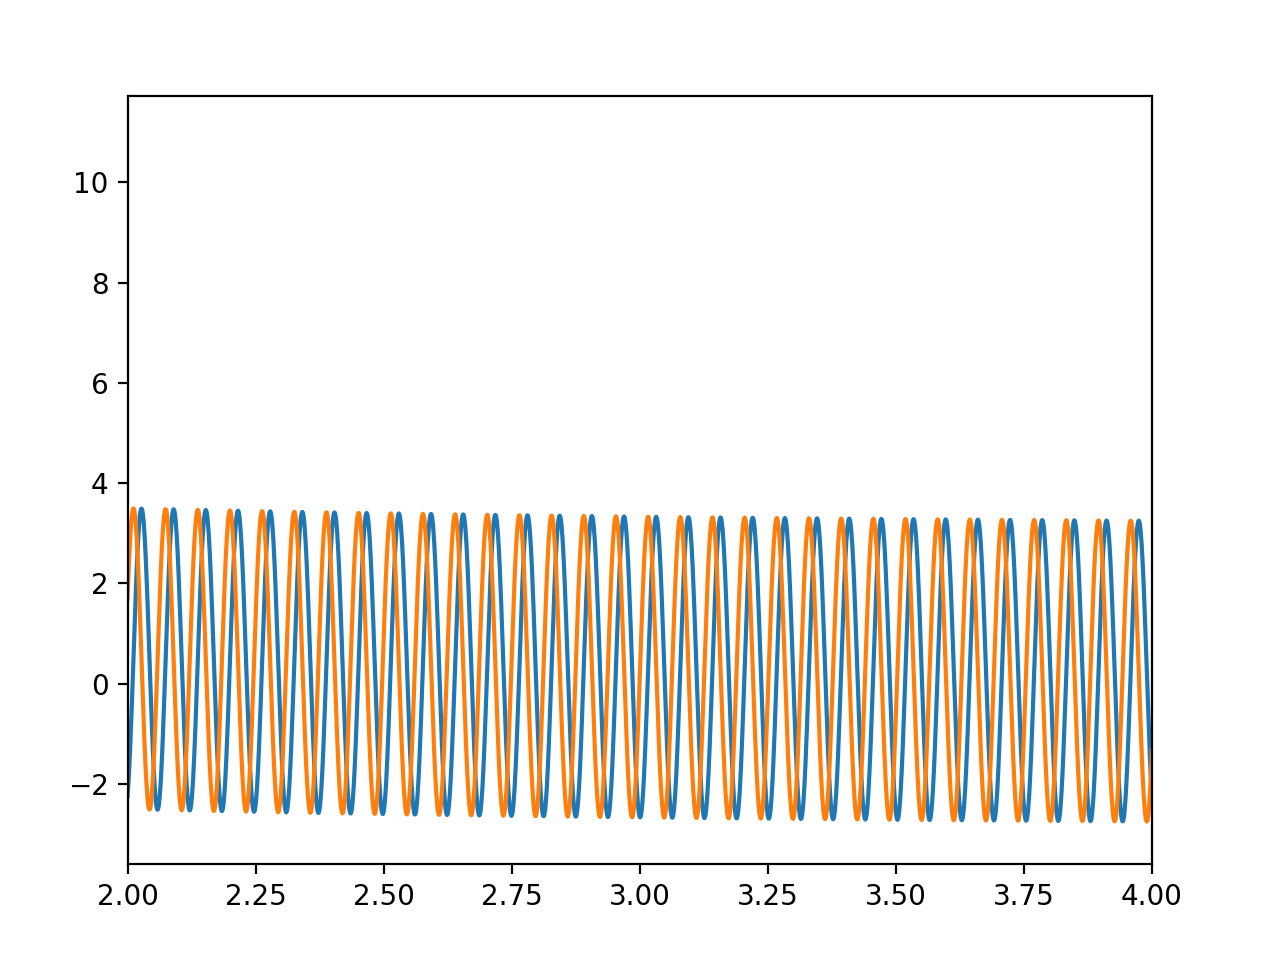

In [9]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,.8,.8])

x = np.arange(.1,10,.001)
y1 = 1/x + 3*np.sin(x*100)

ax.plot(x,y1)
ax.set_xlim(2, 4)

plt.show()

In [10]:
y2 = 1/x + 3*np.cos(x*100)

ax.plot(x,y2)

plt.show()

## Animations

To do animations we need a function, `FuncAnimation()`.

In [11]:
from matplotlib.animation import FuncAnimation

This function takes in a number of arguments that are required. 

We need a figure `fig`, that needs animating with an axis `ax`. We will do the usual setup.

<IPython.core.display.Javascript object>


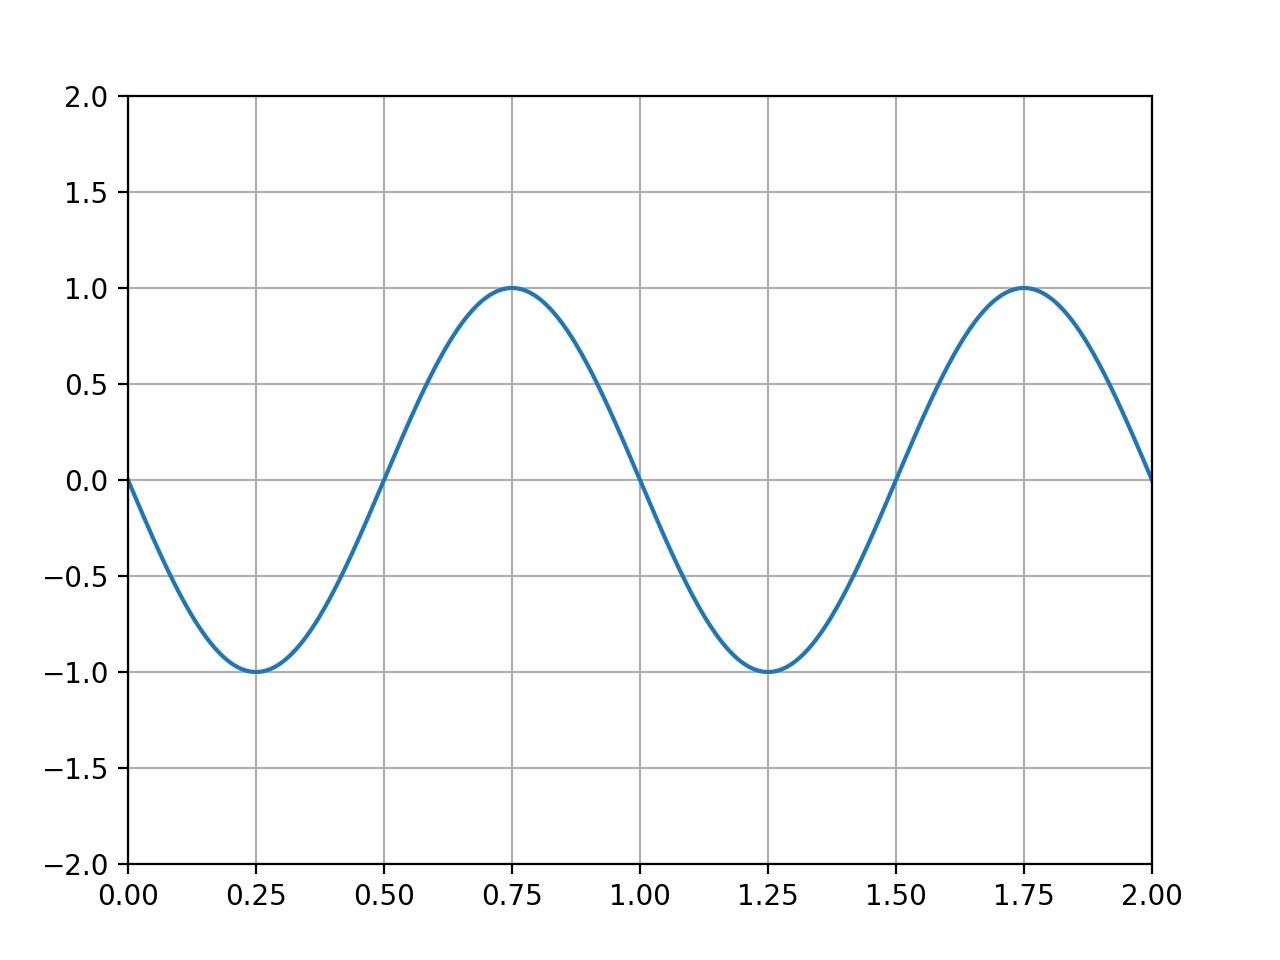

In [12]:
fig_anim = plt.figure()
ax_anim = fig_anim.add_axes([.1,.1,.8,.8])

ax_anim.set_xlim(0, 2)
ax_anim.set_ylim(-2, 2)
ax_anim.grid()

plt.show()

Now keeping this active we will add a plot to the picture. Notice that when we plot we have saved the return `line` item. The `,` is present because this is in `ax.plot()` will in fact return a tupple with the needed item as the first item.

In [13]:
ax_anim.set_xlim(0, 2)
ax_anim.set_ylim(-2, 2)

line, = ax_anim.plot([], [])

plt.show()

The `FuncAnimation()` function requires an initialise function (the `init_func` keyword will be used) that will be called at the start of the animation. We will use the `.set_data()` which gives the data for the curve in the form of two arrays.

In [14]:
def init():
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * x)
    line.set_data(x, y)
    return line,

We will also need to define an other function that will be called repeatedly. This will change the data in our plot in each successive calling of the function. 

In [15]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

The `FuncAnimation()` can now be called with added keywords
- `frames`: Number of frames long animation will be. 
- `interval`: number of milliseconds inbetween frames.
- `repeat_delay`: 
- `blit`: If `True` will not replot parts of lines that are already plotted so it will animate faster. 

In [16]:
anim = FuncAnimation(fig_anim, animate, init_func=init, frames=100, interval=20, repeat_delay=300, blit=True)

plt.show()

To save an animation we need a writer. We will import `matplotlib.animation.PillowWriter()` to do this.

In [17]:
from matplotlib.animation import PillowWriter

mywriter = PillowWriter(fps = 30)

Finally we save the animation.

In [18]:
anim.save('my_animation.gif', writer = mywriter)